In [253]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [254]:
data = pd.DataFrame(pd.read_csv("/home/jovyan/work/test.csv"))

In [255]:
data.drop(columns=['id'],inplace=True)

In [256]:
Ordinal_Attr=["Elevation","Aspect","Slope","Hillshade_9am","Hillshade_noon","Horizontal_Distance_To_Fire_Points"]
Nominal_Attr=['Wilderness','Soil_Type']
Integer_Attr=["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology"]
data.dtypes

Elevation                             object
Aspect                                object
Slope                                 object
Wilderness                            object
Soil_Type                             object
Hillshade_9am                         object
Hillshade_noon                        object
Horizontal_Distance_To_Hydrology       int64
Vertical_Distance_To_Hydrology         int64
Horizontal_Distance_To_Fire_Points    object
dtype: object

In [257]:
ordinal_list=[['elevation_low','elevation_medium', 'elevation_high', 'elevation_ultra'],['aspect_low','aspect_medium', 'aspect_high', 'aspect_ultra'],['slope_low','slope_medium','slope_high', 'slope_ultra'],['hillshade_9am_min', 'hillshade_9am_max'],['hillnoon_min', 'hillnoon_max'],["low","mid","high"]]
ord_enc = OrdinalEncoder(categories=ordinal_list)
data_ordinal = pd.DataFrame(ord_enc.fit_transform(data[Ordinal_Attr]))

In [258]:
one_enc = OneHotEncoder()
data_nominal=pd.DataFrame(one_enc.fit_transform(data[Nominal_Attr]).toarray())

In [259]:
data_integers=data.drop(columns=Nominal_Attr+Ordinal_Attr)
data_final=data_nominal
data_final[data_integers.columns]=data_integers
data_final[Ordinal_Attr]=data_ordinal
# data_final.skew()

In [262]:
pca_reduce = PCA(n_components=20)
X_pca = pd.DataFrame(pca_reduce.fit_transform(data_final))

KMeans

In [265]:
input_data=X_pca

In [276]:
kmeans = KMeans( init="random",n_clusters=9, max_iter=1000,  n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X_pca)

In [277]:
a=list(pd.DataFrame(y_kmeans)[0].value_counts())
a.sort()
a

[345, 411, 428, 452, 467, 482, 488, 519, 528]

In [212]:
center=kmeans.cluster_centers_
center

array([[-0.93010765, -0.06532259],
       [ 3.33143074,  1.16111684],
       [-3.06291654,  1.09252898],
       [ 2.04086232, -2.07879415],
       [-0.43756143,  1.89478737],
       [-3.19248374, -1.02780201],
       [ 1.24332031,  1.10062937],
       [ 2.19927331, -0.4375761 ],
       [ 0.33321322, -1.74896048]])

In [157]:
# pca = PCA(n_components=20)
# principalComponents = pca.fit_transform(X_pca)
# center=pca.transform(cluster)

In [158]:
center

array([[-2.86437104, -0.99708347],
       [-2.79839737,  1.12811798],
       [ 1.37225997, -1.5893385 ],
       [ 2.71826057,  0.74815938],
       [-0.02753129,  1.2677926 ]])

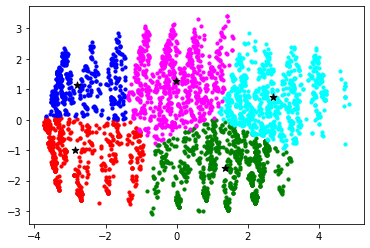

In [159]:
plt.scatter(principalComponents[y_kmeans==0, 0], principalComponents[y_kmeans==0, 1], s=10, c='red', label ='Cluster 1')
plt.scatter(principalComponents[y_kmeans==1, 0], principalComponents[y_kmeans==1, 1], s=10, c='blue', label ='Cluster 2')
plt.scatter(principalComponents[y_kmeans==2, 0], principalComponents[y_kmeans==2, 1], s=10, c='green', label ='Cluster 3')
plt.scatter(principalComponents[y_kmeans==3, 0], principalComponents[y_kmeans==3, 1], s=10, c='cyan', label ='Cluster 4')
plt.scatter(principalComponents[y_kmeans==4, 0], principalComponents[y_kmeans==4, 1], s=10, c='magenta', label ='Cluster 5')
plt.scatter(principalComponents[y_kmeans==5, 0], principalComponents[y_kmeans==5, 1], s=10, c='yellow', label ='Cluster 6')
plt.scatter(principalComponents[y_kmeans==6, 0], principalComponents[y_kmeans==6, 1], s=10, c='orange', label ='Cluster 7')
plt.scatter(principalComponents[y_kmeans==7, 0], principalComponents[y_kmeans==7, 1], s=10, c='slategray', label ='Cluster 8')
plt.scatter(principalComponents[y_kmeans==8, 0], principalComponents[y_kmeans==8, 1], s=10, c='lightgreen', label ='Cluster 9')

plt.scatter( center[:, 0], center[:, 1], s=50, marker='*', c='black', edgecolor='black', label='centroids')

plt.show()

In [295]:
pca_reduce = PCA(n_components=20)
X_pca = pd.DataFrame(pca_reduce.fit_transform(data_final))
input_data=X_pca

AgglomerativeClustering

In [306]:
# clustering = AgglomerativeClustering()
model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
y_agg=model.fit_predict(data_final)
labels = model.labels_

In [307]:
a=list(pd.DataFrame(y_agg)[0].value_counts())
a.sort()
a



[322, 449, 511, 631, 631, 734, 842]

In [252]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(X_pca, y_agg)
# print(clf.centroids_)
center=clf.centroids_
center

array([[-2.49356217, -0.87325027],
       [ 3.04013029,  0.60818765],
       [ 1.60112399, -1.79833478],
       [-0.44595446,  1.34835976],
       [-3.13135629,  1.24280917],
       [ 1.21374005,  2.15483143],
       [ 1.16180897,  0.01731472]])

In [240]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_pca)

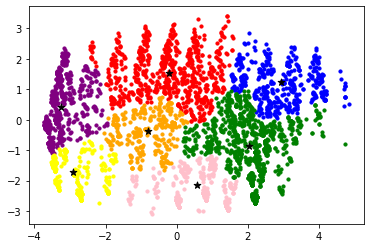

In [241]:
plt.scatter(principalComponents[labels==0, 0], principalComponents[labels==0, 1], s=10,  color='red')
plt.scatter(principalComponents[labels==1, 0], principalComponents[labels==1, 1], s=10,  color='blue')
plt.scatter(principalComponents[labels==2, 0], principalComponents[labels==2, 1], s=10,  color='green')
plt.scatter(principalComponents[labels==3, 0], principalComponents[labels==3, 1], s=10,  color='purple')
plt.scatter(principalComponents[labels==4, 0], principalComponents[labels==4, 1], s=10,  color='orange')
plt.scatter(principalComponents[labels==5, 0], principalComponents[labels==5, 1], s=10,  color='yellow')
plt.scatter(principalComponents[labels==6, 0], principalComponents[labels==6, 1], s=10,  color='pink')
# plt.scatter(principalComponents[y_kmeans==7, 0], principalComponents[y_kmeans==7, 1], s=10, c='slategray', label ='Cluster 8')
# plt.scatter(principalComponents[y_kmeans==8, 0], principalComponents[y_kmeans==8, 1], s=10, c='lightgreen', label ='Cluster 9')
plt.scatter( center[:, 0], center[:, 1], s=50, marker='*', c='black', edgecolor='black', label='centroids')

plt.show()

![Picture title](image-20201204-194253.png)

Kmeans++

In [278]:
pca_reduce = PCA(n_components=20)
X_pca = pd.DataFrame(pca_reduce.fit_transform(data_final))
input_data=X_pca

In [286]:
kmeans = KMeans( init="k-means++",n_clusters=9, max_iter=1000,  n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(input_data)

In [287]:
a=list(pd.DataFrame(y_kmeans)[0].value_counts())

a.sort()
a

[366, 422, 434, 438, 444, 479, 485, 525, 527]

In [200]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(input_data)

In [201]:
center=kmeans.cluster_centers_
center

array([[-0.93010765, -0.06532259],
       [ 3.33143074,  1.16111684],
       [-3.06291654,  1.09252898],
       [ 2.04086232, -2.07879415],
       [-0.43756143,  1.89478737],
       [-3.19248374, -1.02780201],
       [ 1.24332031,  1.10062937],
       [ 2.19927331, -0.4375761 ],
       [ 0.33321322, -1.74896048]])

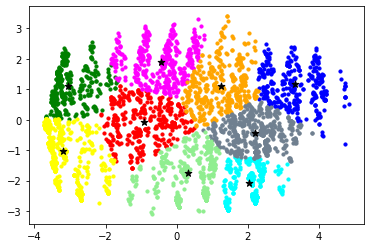

In [202]:
plt.scatter(principalComponents[y_kmeans==0, 0], principalComponents[y_kmeans==0, 1], s=10, c='red', label ='Cluster 1')
plt.scatter(principalComponents[y_kmeans==1, 0], principalComponents[y_kmeans==1, 1], s=10, c='blue', label ='Cluster 2')
plt.scatter(principalComponents[y_kmeans==2, 0], principalComponents[y_kmeans==2, 1], s=10, c='green', label ='Cluster 3')
plt.scatter(principalComponents[y_kmeans==3, 0], principalComponents[y_kmeans==3, 1], s=10, c='cyan', label ='Cluster 4')
plt.scatter(principalComponents[y_kmeans==4, 0], principalComponents[y_kmeans==4, 1], s=10, c='magenta', label ='Cluster 5')
plt.scatter(principalComponents[y_kmeans==5, 0], principalComponents[y_kmeans==5, 1], s=10, c='yellow', label ='Cluster 6')
plt.scatter(principalComponents[y_kmeans==6, 0], principalComponents[y_kmeans==6, 1], s=10, c='orange', label ='Cluster 7')
plt.scatter(principalComponents[y_kmeans==7, 0], principalComponents[y_kmeans==7, 1], s=10, c='slategray', label ='Cluster 8')
plt.scatter(principalComponents[y_kmeans==8, 0], principalComponents[y_kmeans==8, 1], s=10, c='lightgreen', label ='Cluster 9')

plt.scatter( center[:, 0], center[:, 1], s=50, marker='*', c='black', edgecolor='black', label='centroids')

plt.show()